<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Which-Genres-are-the-most-Profitable?" data-toc-modified-id="Which-Genres-are-the-most-Profitable?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Which Genres are the most Profitable?</a></span><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#Clean-up-tn_movie_budgets-dataframe" data-toc-modified-id="Clean-up-tn_movie_budgets-dataframe-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Clean up tn_movie_budgets dataframe</a></span></li><li><span><a href="#Clean-up-imdb_title_basics" data-toc-modified-id="Clean-up-imdb_title_basics-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Clean up imdb_title_basics</a></span></li><li><span><a href="#Join-DataFrames" data-toc-modified-id="Join-DataFrames-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Join DataFrames</a></span></li></ul></li><li><span><a href="#Explore-Genre-Profitability" data-toc-modified-id="Explore-Genre-Profitability-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Explore Genre Profitability</a></span><ul class="toc-item"><li><span><a href="#Outliers" data-toc-modified-id="Outliers-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Outliers</a></span><ul class="toc-item"><li><span><a href="#View-outliers" data-toc-modified-id="View-outliers-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>View outliers</a></span></li><li><span><a href="#Remove-Outliers" data-toc-modified-id="Remove-Outliers-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Remove Outliers</a></span></li><li><span><a href="#Remove-Outliers-by-IQR" data-toc-modified-id="Remove-Outliers-by-IQR-1.2.1.3"><span class="toc-item-num">1.2.1.3&nbsp;&nbsp;</span>Remove Outliers by IQR</a></span></li></ul></li></ul></li><li><span><a href="#Budget-Impact" data-toc-modified-id="Budget-Impact-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Budget Impact</a></span><ul class="toc-item"><li><span><a href="#Create-Budget-Class-Feature" data-toc-modified-id="Create-Budget-Class-Feature-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Create Budget Class Feature</a></span></li><li><span><a href="#Plot-Budget-Class" data-toc-modified-id="Plot-Budget-Class-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Plot Budget Class</a></span></li></ul></li><li><span><a href="#Most-profitable-Genres-by-Budget-Class-Box-Plot" data-toc-modified-id="Most-profitable-Genres-by-Budget-Class-Box-Plot-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Most profitable Genres by Budget Class Box Plot</a></span></li></ul></li></ul></div>

In [1]:
# import dependencies
import pandas as pd
import data_helpers.data_functions as data_functions
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Which Genres are the most Profitable?

## Prepare Data

In [2]:
#import all of the available data
from data_helpers.data import data 
# import importlib
# data = importlib.reload(data_helpers.data)

In [3]:
#delme
for key in data.keys():
    print(key)

imdb_title_crew
tmdb_movies
imdb_title_akas
imdb_title_ratings
imdb_name_basics
imdb_title_basics
tn_movie_budgets
bom_movie_gross
imdb_title_principals
rt_movie_info
rt_reviews


### Clean up tn_movie_budgets dataframe

Convert date column to datetime and strings to int.

In [4]:
### Clean up tn_movie_budgets dataframe

movie_budgets = data['tn_movie_budgets'].copy()

#convert releae_data to datetime and add a release_year column
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets['release_year'] = movie_budgets['release_date'].dt.year

# convert numbers to int
cols = ['production_budget','domestic_gross','worldwide_gross']
movie_budgets[cols] = movie_budgets[cols].replace('[^0-9]', '', regex = True).astype('int')

# remove rows with 0 budget or 0 worldwide_gross
movie_budgets = movie_budgets[movie_budgets['production_budget'] > 0]
movie_budgets = movie_budgets[movie_budgets['worldwide_gross'] > 0]

In [5]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 1 to 82
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5415 non-null   datetime64[ns]
 1   movie              5415 non-null   object        
 2   production_budget  5415 non-null   int64         
 3   domestic_gross     5415 non-null   int64         
 4   worldwide_gross    5415 non-null   int64         
 5   release_year       5415 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 296.1+ KB


In [6]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


### Clean up imdb_title_basics

In [7]:
title_basics = data['imdb_title_basics'].copy()
title_basics.head()

# Drop original_title and runtime_minutes which we don't need for this question
title_basics.drop(['original_title', 'runtime_minutes'], axis = 1, inplace = True)

#drop missing genres and convert remaining to list
title_basics = title_basics.dropna(subset=['genres'])
title_basics['genres'] = title_basics['genres'].map(lambda x: x.split(','))

In [8]:
title_basics.head()

,primary_title,start_year,genres
tconst,,,
tt0063540,Sunghursh,2013,"[Action, Crime, Drama]"
tt0066787,One Day Before the Rainy Season,2019,"[Biography, Drama]"
tt0069049,The Other Side of the Wind,2018,[Drama]
tt0069204,Sabse Bada Sukh,2018,"[Comedy, Drama]"
tt0100275,The Wandering Soap Opera,2017,"[Comedy, Drama, Fantasy]"


### Join DataFrames

In [46]:
df = pd.merge(movie_budgets, title_basics.reset_index(),
             left_on=['movie', 'release_year'],
             right_on=['primary_title', 'start_year'])
df = df.drop(['primary_title','start_year'], axis=1)

df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,genres
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,tt1298650,"[Action, Adventure, Fantasy]"
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,tt6565702,"[Action, Adventure, Sci-Fi]"
2,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,tt2395427,"[Action, Adventure, Sci-Fi]"
3,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,tt4154756,"[Action, Adventure, Sci-Fi]"
4,2017-11-17,Justice League,300000000,229024295,655945209,2017,tt0974015,"[Action, Adventure, Fantasy]"


In [47]:
# explode the genres for grouping
df = df.explode('genres')

In [48]:
#are there na values?
df.genres.isna().sum()

0

## Explore Genre Profitability

In [53]:
# calculate ROI for each film
df['movie_ROI'] = data_functions.calculate_roi(df['production_budget'], df['worldwide_gross'])

In [13]:
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,genres,movie_ROI
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,tt1298650,Action,154.667286
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,tt1298650,Adventure,154.667286
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,tt1298650,Fantasy,154.667286
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,tt6565702,Action,-57.210757
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,tt6565702,Adventure,-57.210757


genres
Mystery      935.682455
Horror       933.490018
Thriller     582.058457
Sci-Fi       280.732439
Animation    278.690125
Name: movie_ROI, dtype: float64

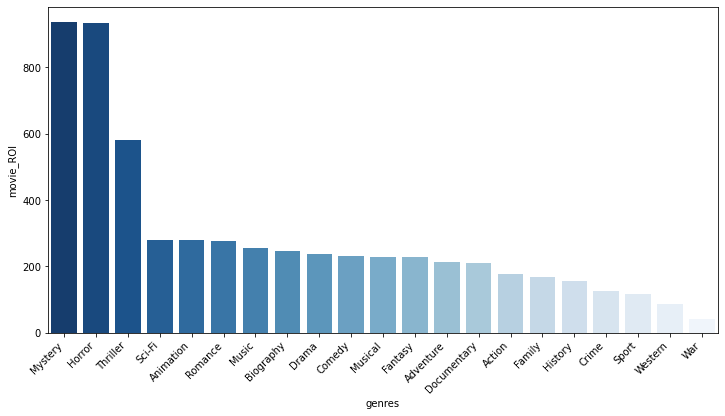

In [14]:
# groupby genre to get mean movie_ROI
genre_ROI = df[['genres', 'movie_ROI']].groupby('genres').mean()
genre_ROI = genre_ROI['movie_ROI'] #just need a series
genre_ROI = genre_ROI.sort_values(ascending = False)
plt.figure(figsize = (12,6))
ax = sns.barplot(y = genre_ROI, x = genre_ROI.index, palette='Blues_r')
plt.xticks(rotation = 45, ha='right');

genre_ROI.head()

<AxesSubplot:xlabel='movie_ROI', ylabel='genres'>

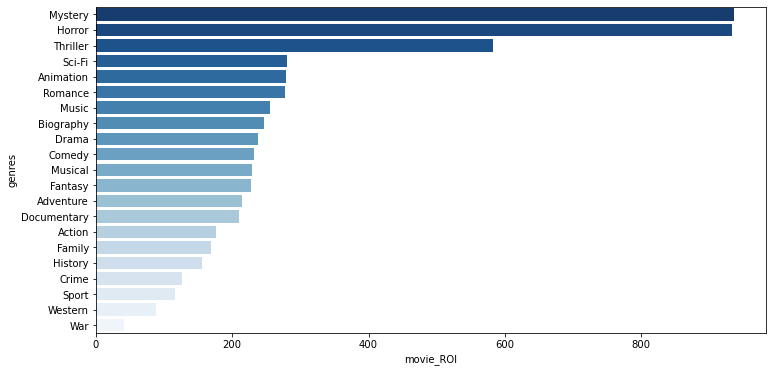

In [15]:
plt.figure(figsize = (12,6))
sns.barplot(x = genre_ROI, y = genre_ROI.index, palette='Blues_r')

### Outliers
#### View outliers
Are outliers dramatically affecting the most profitable genres?

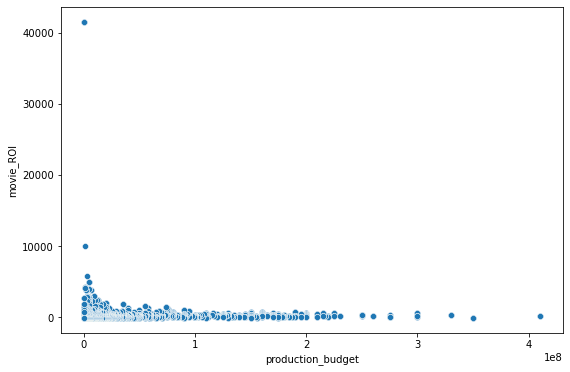

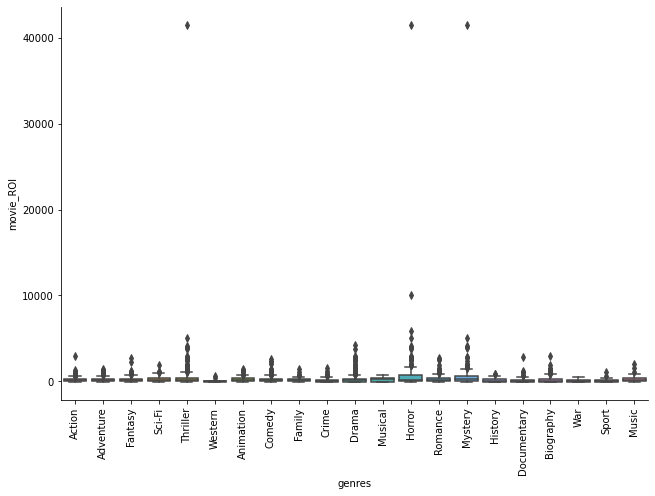

In [16]:
plt.figure(figsize = (9,6))
sns.scatterplot(data = df, x = 'production_budget', y = 'movie_ROI')

sns.catplot(x="genres", y="movie_ROI",
            kind="box", 
            showfliers = True,
            data = df, height=6, aspect=1.5)
plt.xticks(rotation = 90);

#### Remove Outliers

In [17]:
from scipy.stats import zscore

# find the zscore for ROI by genre.
df['ROI_zscore'] = zscore(df['movie_ROI'])
#df['ROI_zscore_by_gere'] = 


In [18]:
df['ROI_zscore_by_genre'] = df.groupby('genres').transform(zscore)['ROI_zscore'] #.reset_index()


In [19]:
print('Number of ROI Outliers (zscore): ', df[df['ROI_zscore'] > 3].shape[0])
print('Number of ROI Outliers by Genre(zscore): ', df[df['ROI_zscore_by_genre'] > 3].shape[0])

Number of ROI Outliers (zscore):  9
Number of ROI Outliers by Genre(zscore):  61


<AxesSubplot:xlabel='production_budget', ylabel='movie_ROI'>

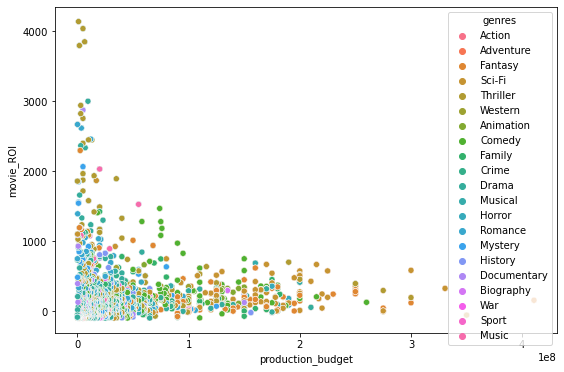

In [20]:
# Plot Both to see if there is a big difference
df_no_outliers = df[df['ROI_zscore'] <= 3]
df_no_genre_outliers = df[df['ROI_zscore_by_genre'] <= 3]

# sns.scatterplot(data = df_no_outliers, x = 'production_budget', y = 'movie_ROI')
# sns.scatterplot(data = df_no_genre_outliers, x = 'production_budget', y = 'movie_ROI')


plt.figure(figsize = (9,6))
sns.scatterplot(data = df_no_outliers, x = 'production_budget', y = 'movie_ROI', hue='genres')


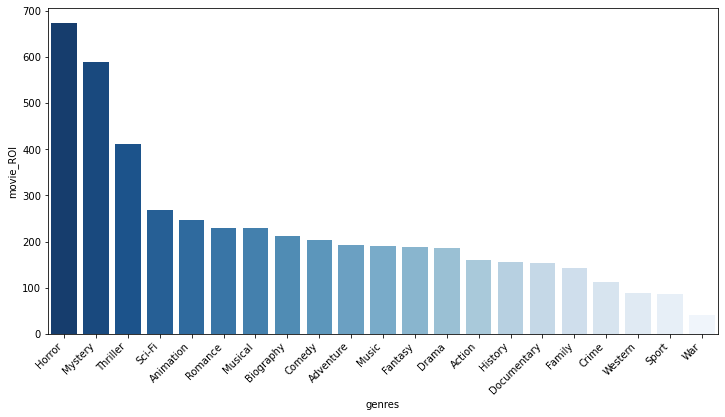

In [22]:
genre_ROI = df_no_genre_outliers[['genres', 'movie_ROI']].groupby('genres').mean()
genre_ROI = genre_ROI['movie_ROI'] #just need a series
genre_ROI = genre_ROI.sort_values(ascending = False)

plt.figure(figsize = (12,6))
ax = sns.barplot(y = genre_ROI, x = genre_ROI.index, palette='Blues_r')
plt.xticks(rotation = 45, ha='right');

#### Remove Outliers by IQR


In [25]:
# #Calculate IQR by genre

# Computing IQR
iqr = pd.DataFrame()
iqr['Q1'] = df.groupby('genres').movie_ROI.quantile(.25)
iqr['Q3'] = df.groupby('genres').movie_ROI.quantile(.75)
iqr['IQR'] = iqr['Q3'] - iqr['Q1']
iqr['upper_thresh'] = iqr['Q3'] + 1.5*iqr['IQR']
iqr['lower_thresh'] = iqr['Q1'] - 1.5*iqr['IQR']
iqr.head()



,Q1,Q3,IQR,upper_thresh,lower_thresh
genres,,,,,
Action,10.454739,265.747196,255.292457,648.685882,-372.483947
Adventure,58.551265,306.361513,247.810248,678.076886,-313.164108
Animation,88.758585,344.781974,256.023389,728.817058,-295.276498
Biography,-26.556187,310.037452,336.593638,814.927909,-531.446644
Comedy,28.196287,320.288082,292.091796,758.425776,-409.941407


In [26]:
df['iqr_upperthresh'] = df['genres'].map(iqr['upper_thresh'])
df_no_genre_outliers_aggressive = df[df['movie_ROI'] < df['iqr_upperthresh']].copy()

In [28]:
# elimnate genres with fewer than 50 movies
genre_count = df_no_genre_outliers_aggressive[['genres', 'movie_ROI']].groupby('genres').count()
genre_count = genre_count['movie_ROI']
genre_count = genre_count[genre_count > 50]
genre_count.sort_values(ascending=False)

df_no_genre_outliers_aggressive = df_no_genre_outliers_aggressive[df_no_genre_outliers_aggressive['genres'].isin(genre_count.index)]

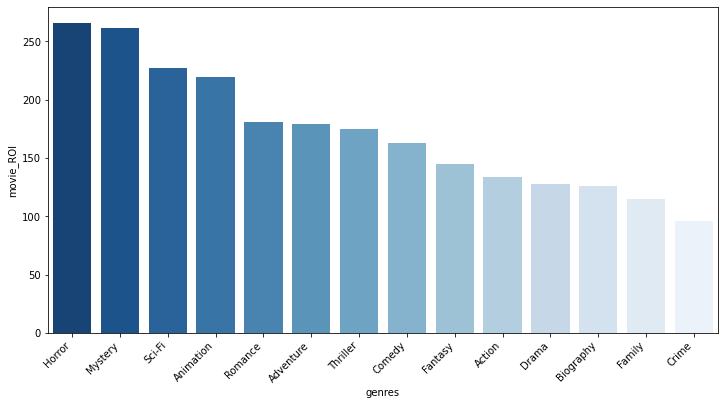

In [29]:
genre_ROI = df_no_genre_outliers_aggressive[['genres', 'movie_ROI']].groupby('genres').mean()
genre_ROI = genre_ROI['movie_ROI'] #just need a series
genre_ROI = genre_ROI.sort_values(ascending = False)

plt.figure(figsize = (12,6))
ax = sns.barplot(y = genre_ROI, x = genre_ROI.index, palette='Blues_r')
plt.xticks(rotation = 45, ha='right');

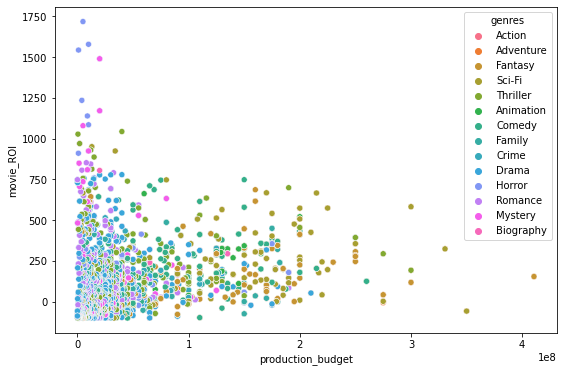

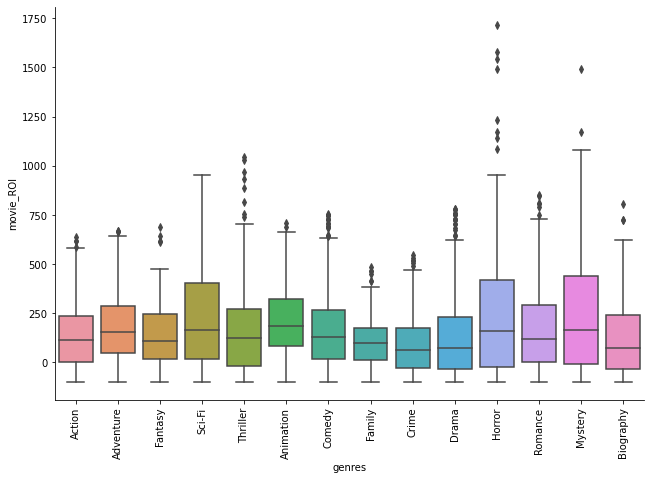

In [32]:
plt.figure(figsize = (9,6))
sns.scatterplot(data = df_no_genre_outliers_aggressive, 
                x = 'production_budget', y = 'movie_ROI', hue='genres')


df_no_genre_outliers_aggressive.loc[:, 'mean_genre_ROI'] = \
    df_no_genre_outliers_aggressive.groupby('genres').movie_ROI.mean()

df_no_genre_outliers_aggressive = df_no_genre_outliers_aggressive.sort_values(by = 'mean_genre_ROI', ascending = False)


sns.catplot(x="genres", y="movie_ROI",
            kind="box", 
            showfliers = True,
            data = df_no_genre_outliers_aggressive, height=6, aspect=1.5)
plt.xticks(rotation = 90);



## Budget Impact

In [33]:
df_no_genre_outliers_aggressive[['production_budget', 'movie_ROI']].corr()

,production_budget,movie_ROI
production_budget,1.0000,0.1269
movie_ROI,0.1269,1.0000


<AxesSubplot:xlabel='production_budget', ylabel='movie_ROI'>

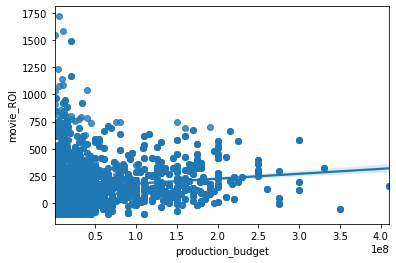

In [34]:
sns.regplot(data = df_no_genre_outliers_aggressive,
                x='production_budget',
                y='movie_ROI' )

Over all genres, the budget and the ROI are not very correlated.

### Create Budget Class Feature

Does budget threshold change the ROI distribution?  We could build a a feature and see which does best for ROI.


Here are the thresholds for the various unions:
    
    The DGA and SAG thresholds for low budget are similar: $2.6 and $2.5 million respectively. The writer’s guild draws the line way down at $1.2 million.

    IATSE (the union that covers most of the below-the-line crew) has three different tiers: below $6 million, between $6 and $10 million, and $10 to $14.2 million. (Anything above that is full union rates.) To give you a sense of scale, Get Out only cost $4.5 million. Then again, not paying the crew full union wages and benefits is probably how Blumhouse keep their films profitable.
    
Source: http://www.anonymousproductionassistant.com/2018/01/17/low-budget-movie/


In [75]:
bc_df = df_no_genre_outliers_aggressive.copy()

In [76]:
bc_df['budget_class'] = bc_df['production_budget'].apply(data_functions.get_budget_class)
bc_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,genres,movie_ROI,ROI_zscore,ROI_zscore_by_genre,iqr_upperthresh,mean_genre_ROI,budget_class
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,tt1298650,Action,154.667286,-0.108970,-0.080223,648.685882,NaN,14.2m +
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,tt1298650,Adventure,154.667286,-0.108970,-0.250525,678.076886,NaN,14.2m +
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,tt1298650,Fantasy,154.667286,-0.108970,-0.185940,738.484455,NaN,14.2m +
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,tt6565702,Action,-57.210757,-0.272554,-0.876164,648.685882,NaN,14.2m +
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,tt6565702,Adventure,-57.210757,-0.272554,-1.134340,678.076886,NaN,14.2m +


In [77]:
#create a df with top grenes by average genre_ROI
top_genres = bc_df[['genres', 'movie_ROI']].groupby('genres').mean()
top_genres.columns = ['mean_ROI']
top_genres = top_genres.sort_values(by = 'mean_ROI', ascending = False)
top_genres.head()

,mean_ROI
genres,
Horror,266.239155
Mystery,261.537215
Sci-Fi,227.174974
Animation,219.539975
Romance,180.596509


### Plot Budget Class

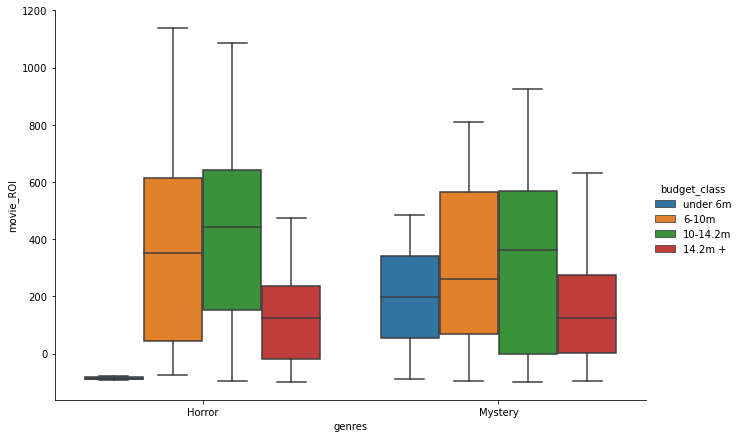

In [78]:
sns.catplot(x="genres", 
            y="movie_ROI", 
            hue="budget_class", 
            hue_order=['under 6m', '6-10m', '10-14.2m', '14.2m +'], 
            kind="box", 
            height = 6,
            aspect = 1.5,
            showfliers = False, 
            data=bc_df[bc_df['genres'].isin(top_genres.index[:2])])


In [79]:
bc_df.groupby(['genres', 'budget_class']).tconst.nunique()[['Horror', 'Mystery']]

genres   budget_class
Horror   10-14.2m        23
         14.2m +         61
         6-10m           13
         under 6m         3
Mystery  10-14.2m        18
         14.2m +         57
         6-10m           10
         under 6m         2
Name: tconst, dtype: int64

Drop the under 6m category, not enough data

## Most profitable Genres by Budget Class Box Plot

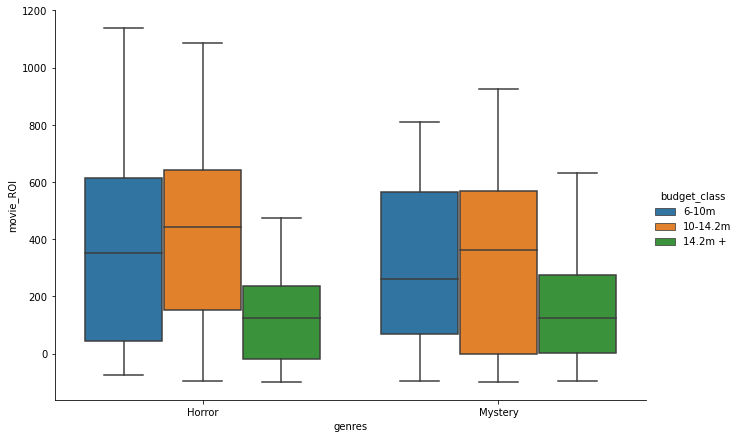

In [80]:
sns.catplot(x="genres", 
            y="movie_ROI", 
            hue="budget_class", 
            hue_order=['6-10m', '10-14.2m', '14.2m +'], 
            kind="box", 
            height = 6,
            aspect = 1.5,
            showfliers = False, 
            data=bc_df[bc_df['genres'].isin(top_genres.index[:2])])
